# **Problem Definition**

`Problem:`
The proliferation of fake news has significant implications, including misleading the public and undermining trust in legitimate news sources. Identifying and categorizing news articles as real or fake is essential for maintaining information integrity.

`Objective:`
The goal is to build a predictive model to classify news articles as either "Fake" or "True" using Natural Language Processing (NLP) techniques.

In [14]:
#import
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, roc_auc_score, roc_curve, auc, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC

from scipy.sparse import hstack


In [15]:
df_clean = pd.read_csv(r'C:\Users\GGPC\IoD_Mini_Projects\Mini_Project_3\data\raw\Clean_columns.csv')

In [16]:
df_clean = df_clean.drop(columns='Unnamed: 0')
df_clean = df_clean.copy()

df_clean

,title,text,subject,label,clean_title,clean_text,labelE
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,1,budget fight loom republican flip fiscal script,washington head conservative republican factio...,Human
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,1,military accept transgender recruit monday pen...,washington transgender people allowed first ti...,Human
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,1,senior republican senator mueller job,washington special counsel investigation link ...,Human
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,1,fbi russia probe helped australian diplomat nyt,washington trump campaign adviser george papad...,Human
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,1,trump want postal service charge amazon shipment,president donald trump called postal service f...,Human
...,...,...,...,...,...,...,...
44052,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,0,mcpain john mccain furious iran treated u sail...,century wire say reported earlier week unlikel...,AI
44053,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,0,justice yahoo settle privacy lawyer user,century wire say familiar theme whenever dispu...,AI
44054,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,0,sunnistan u allied safe zone plan take territo...,patrick henningsen century wireremember obama ...,AI
44055,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,0,blow million al jazeera america finally call q...,century wire say al jazeera america go history...,AI


## **Feature Engineering**

In [17]:
df_clean['clean_text'].isnull().sum()

0

In [18]:
tfidf_title = TfidfVectorizer(max_features=5000, ngram_range=(1, 2))
tfidf_text = TfidfVectorizer(max_features=10000, ngram_range=(1, 2))

X_title = tfidf_title.fit_transform(df_clean['clean_title'])
X_text = tfidf_text.fit_transform(df_clean['clean_text'])

y = df_clean['label']

In [19]:
X_train_title, X_test_title, y_train_title, y_test_title = train_test_split(X_title, y, test_size=0.2, random_state=1)
X_train_text, X_test_text, y_train_text, y_test_text = train_test_split(X_text, y, test_size=0.2, random_state=1)

In [20]:
def plot_confusion_matrix(y_test, y_test_pred, model_name):
    cm = confusion_matrix(y_test, y_test_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.show()

In [21]:
def plot_roc_curve(y_test, y_pred_proba, model_name):
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic - {model_name}')
    plt.legend(loc="lower right")
    plt.show()

## **Defining functions**

In [22]:
def evaluate_model(X_train, y_train, X_test, y_test, model):
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_precision = precision_score(y_train, y_train_pred, average='weighted')
    train_recall = recall_score(y_train, y_train_pred, average='weighted')
    train_f1 = f1_score(y_train, y_train_pred, average='weighted')
    
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_precision = precision_score(y_test, y_test_pred, average='weighted')
    test_recall = recall_score(y_test, y_test_pred, average='weighted')
    test_f1 = f1_score(y_test, y_test_pred, average='weighted')
    
    test_report = classification_report(y_test, y_test_pred)
    test_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
    
    return train_accuracy, train_precision, train_recall, train_f1, test_accuracy, test_precision, test_recall, test_f1, test_report, test_auc

In [23]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'SVM': SVC(kernel= 'linear', probability= True),
    'Random Forest Classifier': RandomForestClassifier(n_estimators=100)
}

below was without ROC AUC score update to the function

In [24]:
# for model_name, model in models.items():
#     model.fit(X_title_train, y_title_train)
#     y_train_pred = model.predict(X_title_train)
#     y_test_pred = model.predict(X_title_test)

#     model_train_accuracy, model_train_prec, model_train_rec, model_train_f1, model_train_rep = title_evaluate_model(y_title_train, y_train_pred)
#     model_test_accuracy, model_test_prec, model_test_rec, model_test_f1, model_test_rep = title_evaluate_model(y_title_test, y_test_pred)

#     print(f'Model: {model_name}')
#     print(f'Data: Title')
#     print('Model performance for Training set')
#     print(f'- Train Accuracy: {model_train_accuracy:.4f}')
#     print(f'- Train Precision: {model_train_prec:.4f}')
#     print(f'- Train Recall: {model_train_rec:.4f}')
#     print(f'- Train F1: {model_train_f1:.4f}')
#     print(f'- Train Report: \n{model_train_rep}')

#     print('Model performance for Test set')
#     print(f'- Test Accuracy: {model_test_accuracy:.4f}')
#     print(f'- Test Precision: {model_test_prec:.4f}')
#     print(f'- Test Recall: {model_test_rec:.4f}')
#     print(f'- Test F1: {model_test_f1:.4f}')
#     print(f'- Test Report: \n{model_test_rep}')
#     print('\n' + '-'*50 + '\n')

# # Create a DataFrame to compare the models
# results = pd.DataFrame({
#     'Model': ['Logistic Regression', 'Random Forest', 'SVM'],
#     'Accuracy': [model_test_accuracy, model_test_prec, model_test_rec],
#     'Precision': [model_train_accuracy, model_train_prec, model_train_rec],
#     'Recall': [model_test_f1, model_test_rep, model_train_rep],
#     'F1 Score': [model_train_f1, model_train_rep, model_train_rep]
# })

Updated model evaluation loops for text and title.

Evaluation for Title Features
Model: Logistic Regression
Train Accuracy: 0.9547
Train Precision: 0.9548
Train Recall: 0.9547
Train F1: 0.9548
Test Accuracy: 0.9386
Test Precision: 0.9388
Test Recall: 0.9386
Test F1: 0.9386
Test Report:
              precision    recall  f1-score   support

           0       0.95      0.93      0.94      4566
           1       0.93      0.95      0.94      4246

    accuracy                           0.94      8812
   macro avg       0.94      0.94      0.94      8812
weighted avg       0.94      0.94      0.94      8812

Test AUC: 0.9859


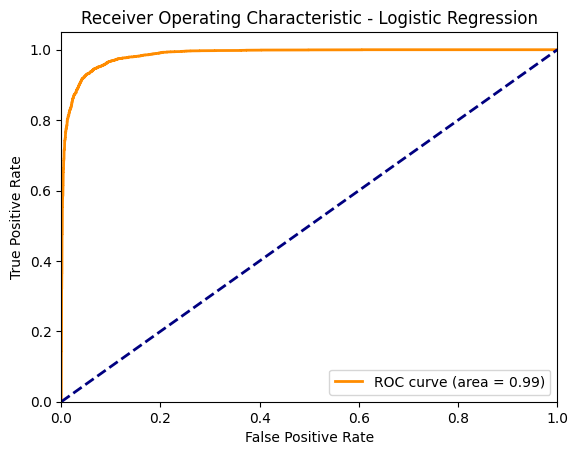

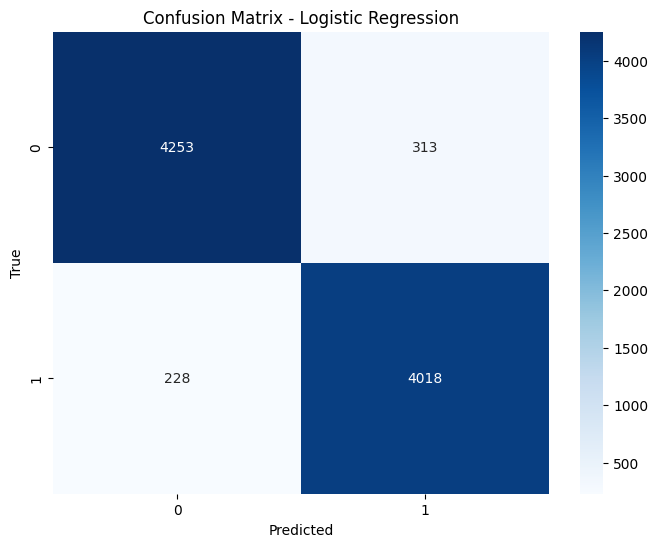

--------------------------------------------------
Model: SVM
Train Accuracy: 0.9645
Train Precision: 0.9646
Train Recall: 0.9645
Train F1: 0.9645
Test Accuracy: 0.9416
Test Precision: 0.9417
Test Recall: 0.9416
Test F1: 0.9416
Test Report:
              precision    recall  f1-score   support

           0       0.95      0.94      0.94      4566
           1       0.93      0.95      0.94      4246

    accuracy                           0.94      8812
   macro avg       0.94      0.94      0.94      8812
weighted avg       0.94      0.94      0.94      8812

Test AUC: 0.9866


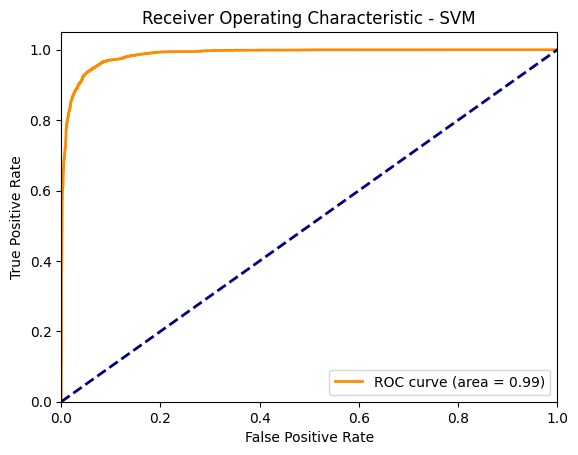

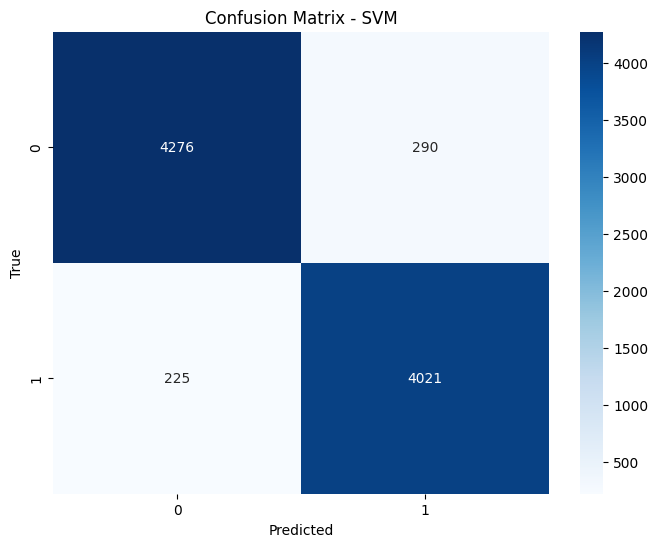

--------------------------------------------------
Model: Random Forest Classifier
Train Accuracy: 1.0000
Train Precision: 1.0000
Train Recall: 1.0000
Train F1: 1.0000
Test Accuracy: 0.9320
Test Precision: 0.9320
Test Recall: 0.9320
Test F1: 0.9320
Test Report:
              precision    recall  f1-score   support

           0       0.93      0.94      0.93      4566
           1       0.93      0.93      0.93      4246

    accuracy                           0.93      8812
   macro avg       0.93      0.93      0.93      8812
weighted avg       0.93      0.93      0.93      8812

Test AUC: 0.9821


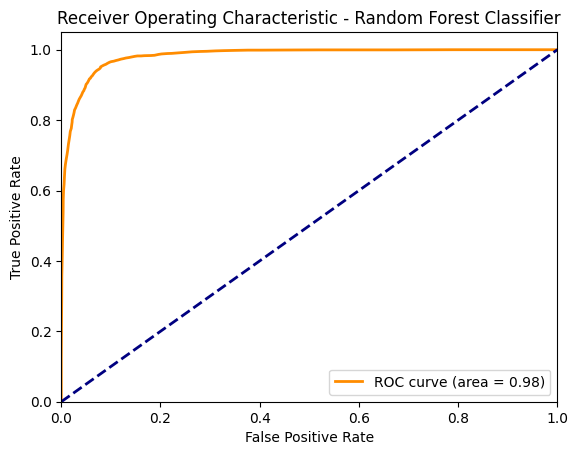

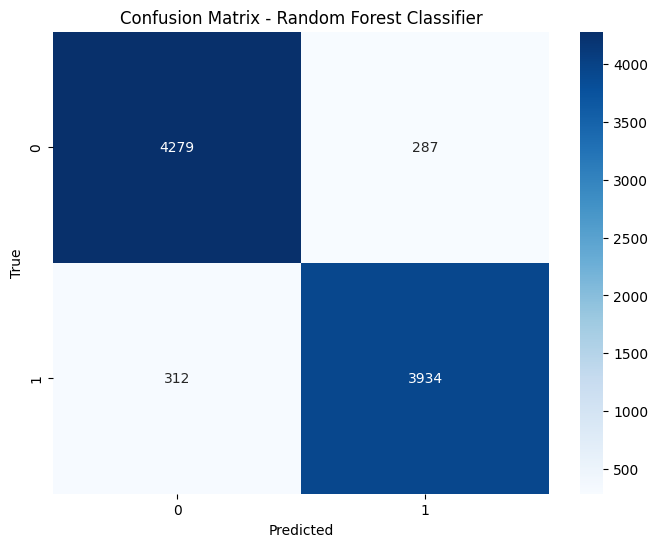

--------------------------------------------------
Evaluation for Text Features
Model: Logistic Regression
Train Accuracy: 0.9870
Train Precision: 0.9870
Train Recall: 0.9870
Train F1: 0.9870
Test Accuracy: 0.9791
Test Precision: 0.9792
Test Recall: 0.9791
Test F1: 0.9791
Test Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      4566
           1       0.97      0.98      0.98      4246

    accuracy                           0.98      8812
   macro avg       0.98      0.98      0.98      8812
weighted avg       0.98      0.98      0.98      8812

Test AUC: 0.9973


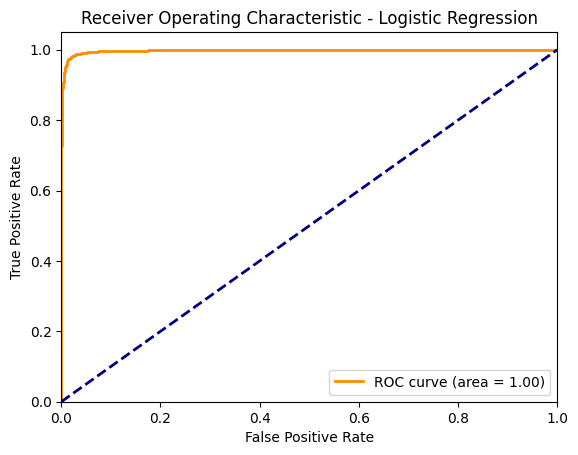

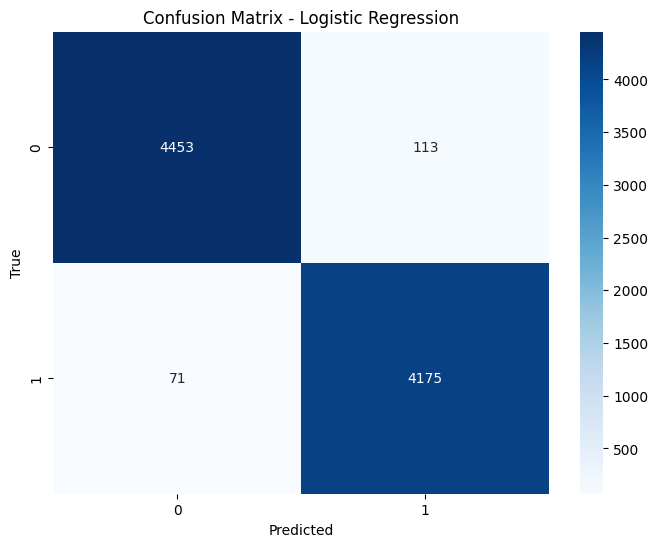

--------------------------------------------------
Model: SVM
Train Accuracy: 0.9951
Train Precision: 0.9952
Train Recall: 0.9951
Train F1: 0.9951
Test Accuracy: 0.9865
Test Precision: 0.9865
Test Recall: 0.9865
Test F1: 0.9865
Test Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4566
           1       0.98      0.99      0.99      4246

    accuracy                           0.99      8812
   macro avg       0.99      0.99      0.99      8812
weighted avg       0.99      0.99      0.99      8812

Test AUC: 0.9982


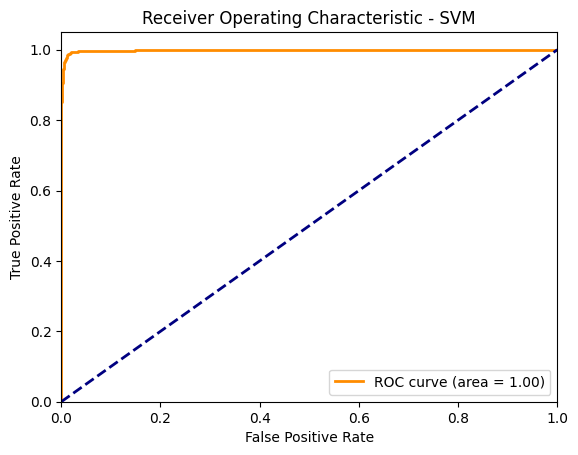

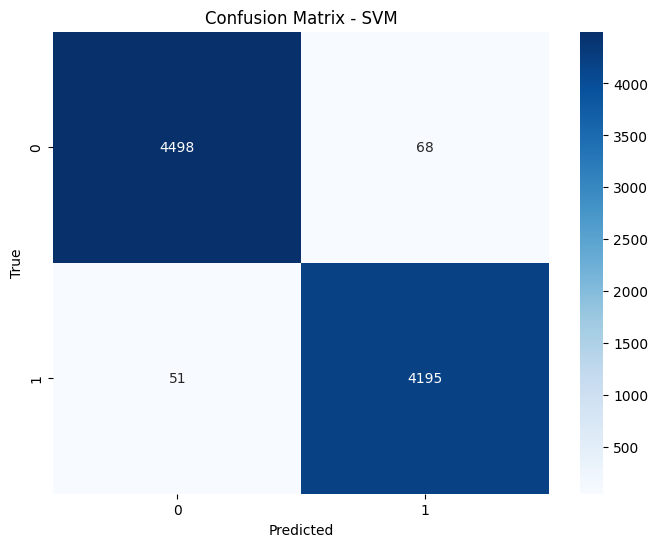

--------------------------------------------------
Model: Random Forest Classifier
Train Accuracy: 1.0000
Train Precision: 1.0000
Train Recall: 1.0000
Train F1: 1.0000
Test Accuracy: 0.9831
Test Precision: 0.9831
Test Recall: 0.9831
Test F1: 0.9831
Test Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      4566
           1       0.98      0.99      0.98      4246

    accuracy                           0.98      8812
   macro avg       0.98      0.98      0.98      8812
weighted avg       0.98      0.98      0.98      8812

Test AUC: 0.9983


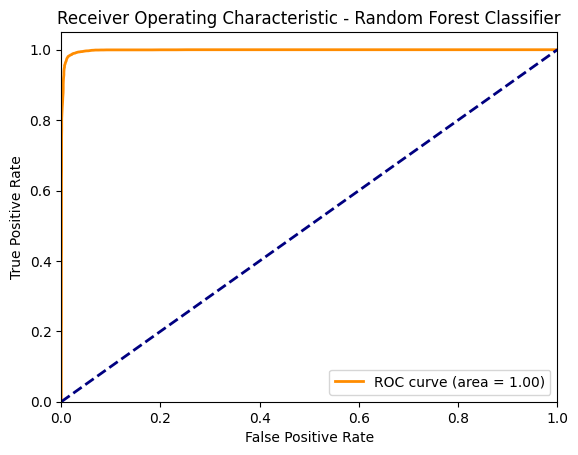

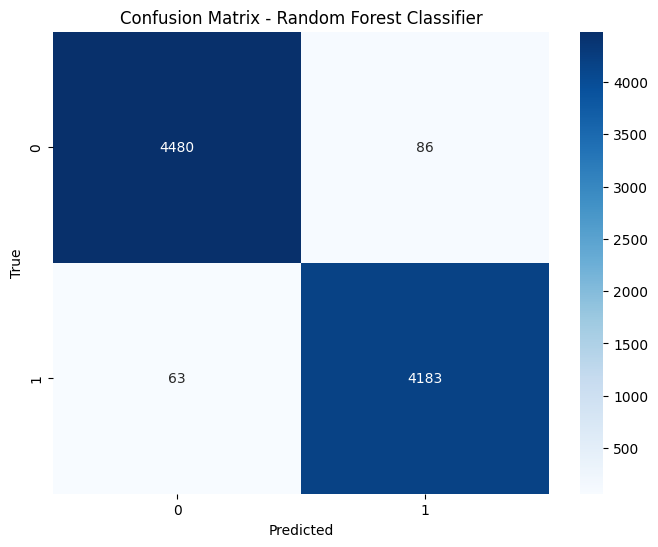

--------------------------------------------------


In [25]:
print("Evaluation for Title Features")
for name, model in models.items():
    train_acc, train_prec, train_rec, train_f1, test_acc, test_prec, test_rec, test_f1, test_rep, test_auc = evaluate_model(X_train_title, y_train_title, X_test_title, y_test_title, model)
    print(f"Model: {name}")
    print(f"Train Accuracy: {train_acc:.4f}")
    print(f"Train Precision: {train_prec:.4f}")
    print(f"Train Recall: {train_rec:.4f}")
    print(f"Train F1: {train_f1:.4f}")
    print(f"Test Accuracy: {test_acc:.4f}")
    print(f"Test Precision: {test_prec:.4f}")
    print(f"Test Recall: {test_rec:.4f}")
    print(f"Test F1: {test_f1:.4f}")
    print(f"Test Report:\n{test_rep}")
    print(f"Test AUC: {test_auc:.4f}")
    plot_roc_curve(y_test_title, model.predict_proba(X_test_title)[:, 1], name)
    plot_confusion_matrix(y_test_title, model.predict(X_test_title), name)
    print("-" * 50)


print("Evaluation for Text Features")
for name, model in models.items():
    train_acc, train_prec, train_rec, train_f1, test_acc, test_prec, test_rec, test_f1, test_rep, test_auc = evaluate_model(X_train_text, y_train_text, X_test_text, y_test_text, model)
    print(f"Model: {name}")
    print(f"Train Accuracy: {train_acc:.4f}")
    print(f"Train Precision: {train_prec:.4f}")
    print(f"Train Recall: {train_rec:.4f}")
    print(f"Train F1: {train_f1:.4f}")
    print(f"Test Accuracy: {test_acc:.4f}")
    print(f"Test Precision: {test_prec:.4f}")
    print(f"Test Recall: {test_rec:.4f}")
    print(f"Test F1: {test_f1:.4f}")
    print(f"Test Report:\n{test_rep}")
    print(f"Test AUC: {test_auc:.4f}")
    plot_roc_curve(y_test_text, model.predict_proba(X_test_text)[:, 1], name)
    plot_confusion_matrix(y_test_text, model.predict(X_test_text), name)
    print("-" * 50)
